<a href="https://colab.research.google.com/github/selfor21/NN-FROM-SCRATCH-LOW-LEVEL/blob/main/C_05_NN_Error_with_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Network Error with Loss

In [1]:
''' With a randomly-initialized model, or even a model initialized with more sophisticated
approaches, our goal is to train, or teach, a model over time. To train a model, we tweak the
weights and biases to improve the model’s accuracy and confidence. To do this, we calculate how
much error the model has. The loss function, also referred to as the cost function, is the algorithm
that quantifies how wrong a model is. Loss is the measure of this metric. Since loss is the model’s
error, we ideally want it to be 0'''

' With a randomly-initialized model, or even a model initialized with more sophisticated\napproaches, our goal is to train, or teach, a model over time. To train a model, we tweak the\nweights and biases to improve the model’s accuracy and confidence. To do this, we calculate how\nmuch error the model has. The loss function, also referred to as the cost function, is the algorithm\nthat quantifies how wrong a model is. Loss is the measure of this metric. Since loss is the model’s\nerror, we ideally want it to be 0'

## Libraries and Data

In [2]:
pip install nnfs

In [3]:
import numpy as np
import math
import nnfs
nnfs.init()

In [4]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

## Class - Layer_Dense

In [5]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
      self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
      self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
      self.output = np.dot(inputs, self.weights) + self.biases


## Class - Activation Function - Softmax and ReLU

In [6]:
class Activation_ReLU:
  # Forward Pass
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)


In [7]:
# Softmax activation
class Activation_Softmax:
# Forward pass
  def forward(self, inputs):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
  # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

## Class - Loss

In [8]:
# Common loss class
# Calculates the data and regularization losses given model output and ground truth values

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

In [9]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
  # Number of samples in a batch
    samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values - only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[ range(samples), y_true ]
  # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum( y_pred_clipped*y_true, axis=1 )
  # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

## Categorical Cross-Entropy Loss

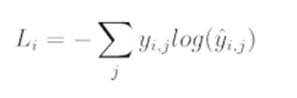

### An Example

In [10]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)


In [11]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()


In [12]:
dense1.forward(X)
print(np.round(dense1.output[:2],8))

[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-1.0475e-04  1.1395e-04 -4.7980e-05]]


In [13]:
activation1.forward(dense1.output)
print(np.round(activation1.output[:2],8))

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]]


In [14]:
dense2.forward(activation1.output)
print(np.round(dense2.output[:2],8))

[[ 0.00e+00  0.00e+00  0.00e+00]
 [-1.80e-07 -1.50e-07  1.23e-06]]


In [15]:
activation2.forward(dense2.output)
print(np.round(activation2.output[:5],8))

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


In [16]:
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

loss: 1.0986104


## Accuracy

In [19]:
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
[0.5, 0.1, 0.4],
[0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
print(predictions)

[0 0 1]


In [16]:
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
  class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

In [22]:
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
  y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

acc: 0.34
